## **Data retrieval**

In [ ]:
from google.colab import files, drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from random import shuffle 
from tqdm.notebook import trange, tqdm
import glob as glb 		
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os

Project folder

In [ ]:
project_path = "/content/drive/MyDrive/accent_classifier/"
data_path = "/content/drive/MyDrive/accent_classifier/data"

if not os.path.exists(project_path):
  !mkdir "/content/drive/MyDrive/accent_classifier/"
if not os.path.exists(data_path):
  !mkdir "/content/drive/MyDrive/accent_classifier/data"

Spectrograms

In [ ]:
spectro_path = "/content/drive/MyDrive/accent_classifier/spectro"

if not os.path.exists(spectro_path):
  !mkdir "/content/drive/MyDrive/accent_classifier/spectro"
  !mkdir "/content/drive/MyDrive/accent_classifier/spectro/BJ/"
  !mkdir "/content/drive/MyDrive/accent_classifier/spectro/CT/"
  !mkdir "/content/drive/MyDrive/accent_classifier/spectro/TP/"

!unzip "/content/drive/MyDrive/accent_classifier/data/spectro_BJ.zip"  -d "/content/drive/MyDrive/accent_classifier/spectro/BJ/"
!unzip "/content/drive/MyDrive/accent_classifier/data/spectro_CT.zip"  -d "/content/drive/MyDrive/accent_classifier/spectro/CT/"
!unzip "/content/drive/MyDrive/accent_classifier/data/spectro_TP.zip"  -d "/content/drive/MyDrive/accent_classifier/spectro/TP/"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/drive/MyDrive/accent_classifier/spectro/TP/spectro/common_voice_zh-CN_22112894_BJ_female_fourties_sans_silence_1_spectro.png  
  inflating: /content/drive/MyDrive/accent_classifier/spectro/TP/spectro/common_voice_zh-CN_22478751_BJ_male_twenties_sans_silence_3_spectro.png  
  inflating: /content/drive/MyDrive/accent_classifier/spectro/TP/spectro/common_voice_zh-CN_21949319_BJ_female_fourties_sans_silence_2_spectro.png  
  inflating: /content/drive/MyDrive/accent_classifier/spectro/TP/spectro/common_voice_zh-CN_18626820_BJ_male_thirties_sans_silence_5_spectro.png  
  inflating: /content/drive/MyDrive/accent_classifier/spectro/TP/spectro/common_voice_zh-CN_18627354_BJ_male_thirties_sans_silence_2_spectro.png  
  inflating: /content/drive/MyDrive/accent_classifier/spectro/TP/spectro/common_voice_zh-CN_22112361_BJ_female_fourties_sans_silence_1_spectro.png  
  inflating: /content/drive/MyDriv

MFCC

In [ ]:
mfcc_path = "/content/drive/MyDrive/accent_classifier/mfcc"

if not os.path.exists(mfcc_path):
  !mkdir "/content/drive/MyDrive/accent_classifier/mfcc"
  !mkdir "/content/drive/MyDrive/accent_classifier/mfcc/BJ/"
  !mkdir "/content/drive/MyDrive/accent_classifier/mfcc/CT/"
  !mkdir "/content/drive/MyDrive/accent_classifier/mfcc/TP/"
  
!unzip "/content/drive/MyDrive/accent_classifier/data/MFCC_BJ.zip" -d "/content/drive/MyDrive/accent_classifier/mfcc/BJ/"
!unzip "/content/drive/MyDrive/accent_classifier/data/MFCC_CT.zip" -d "/content/drive/MyDrive/accent_classifier/mfcc/CT/"
!unzip "/content/drive/MyDrive/accent_classifier/data/MFCC_TP.zip" -d "/content/drive/MyDrive/accent_classifier/mfcc/TP/"

unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/MFCC_BJ.zip, /content/drive/MyDrive/accent_classifier/data/MFCC_BJ.zip.zip or /content/drive/MyDrive/accent_classifier/data/MFCC_BJ.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/MFCC_CT.zip, /content/drive/MyDrive/accent_classifier/data/MFCC_CT.zip.zip or /content/drive/MyDrive/accent_classifier/data/MFCC_CT.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/MFCC_TP.zip, /content/drive/MyDrive/accent_classifier/data/MFCC_TP.zip.zip or /content/drive/MyDrive/accent_classifier/data/MFCC_TP.zip.ZIP.


Pitch

In [ ]:
pitch_path = "/content/drive/MyDrive/accent_classifier/pitch"

if not os.path.exists(pitch_path):
  !mkdir "/content/drive/MyDrive/accent_classifier/pitch"
  !mkdir "/content/drive/MyDrive/accent_classifier/pitch/BJ/"
  !mkdir "/content/drive/MyDrive/accent_classifier/pitch/CT/"
  !mkdir "/content/drive/MyDrive/accent_classifier/pitch/TP/"
  
!unzip "/content/drive/MyDrive/accent_classifier/data/pitch_BJ.zip" -d "/content/drive/MyDrive/accent_classifier/pitch/BJ/"
!unzip "/content/drive/MyDrive/accent_classifier/data/pitch_CT.zip" -d "/content/drive/MyDrive/accent_classifier/pitch/CT/"
!unzip "/content/drive/MyDrive/accent_classifier/data/pitch_TP.zip" -d "/content/drive/MyDrive/accent_classifier/pitch/TP/"

unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/pitch_BJ.zip, /content/drive/MyDrive/accent_classifier/data/pitch_BJ.zip.zip or /content/drive/MyDrive/accent_classifier/data/pitch_BJ.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/pitch_CT.zip, /content/drive/MyDrive/accent_classifier/data/pitch_CT.zip.zip or /content/drive/MyDrive/accent_classifier/data/pitch_CT.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/pitch_TP.zip, /content/drive/MyDrive/accent_classifier/data/pitch_TP.zip.zip or /content/drive/MyDrive/accent_classifier/data/pitch_TP.zip.ZIP.


Formants

In [ ]:
formant_path = "/content/drive/MyDrive/accent_classifier/formant"

if not os.path.exists(formant_path):
  !mkdir "/content/drive/MyDrive/accent_classifier/formant"
  !mkdir "/content/drive/MyDrive/accent_classifier/formant/BJ/"
  !mkdir "/content/drive/MyDrive/accent_classifier/formant/CT/"
  !mkdir "/content/drive/MyDrive/accent_classifier/formant/TP/"
  
!unzip "/content/drive/MyDrive/accent_classifier/data/formant_BJ.zip" -d "/content/drive/MyDrive/accent_classifier/formant/BJ/"
!unzip "/content/drive/MyDrive/accent_classifier/data/formant_CT.zip" -d "/content/drive/MyDrive/accent_classifier/formant/CT/"
!unzip "/content/drive/MyDrive/accent_classifier/data/formant_TP.zip" -d "/content/drive/MyDrive/accent_classifier/formant/TP/"

unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/formant_BJ.zip, /content/drive/MyDrive/accent_classifier/data/formant_BJ.zip.zip or /content/drive/MyDrive/accent_classifier/data/formant_BJ.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/formant_CT.zip, /content/drive/MyDrive/accent_classifier/data/formant_CT.zip.zip or /content/drive/MyDrive/accent_classifier/data/formant_CT.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/accent_classifier/data/formant_TP.zip, /content/drive/MyDrive/accent_classifier/data/formant_TP.zip.zip or /content/drive/MyDrive/accent_classifier/data/formant_TP.zip.ZIP.


### Path retrieval

In [ ]:
# spectrograms
spectro_paths_BJ = glb.glob("/content/drive/MyDrive/accent_classifier/spectro/BJ/spectro/*")
spectro_paths_CT = glb.glob("/content/drive/MyDrive/accent_classifier/spectro/CT/spectro/*")
spectro_paths_TP = glb.glob("/content/drive/MyDrive/accent_classifier/spectro/TP/spectro/*")

# MFCC
mfcc_paths_BJ = glb.glob("/content/drive/MyDrive/accent_classifier/mfcc/BJ/*")
mfcc_paths_CT = glb.glob("/content/drive/MyDrive/accent_classifier/mfcc/CT/*")
mfcc_paths_TP = glb.glob("/content/drive/MyDrive/accent_classifier/mfcc/TP/*")

# pitch 
pitch_paths_BJ = glb.glob("/content/drive/MyDrive/accent_classifier/pitch/BJ/*")
pitch_paths_CT = glb.glob("/content/drive/MyDrive/accent_classifier/pitch/CT/*")
pitch_paths_TP = glb.glob("/content/drive/MyDrive/accent_classifier/pitch/TP/*")

# formants
formant_paths_BJ = glb.glob("/content/drive/MyDrive/accent_classifier/formant/BJ/*")
formant_paths_CT = glb.glob("/content/drive/MyDrive/accent_classifier/formant/CT/*")
formant_paths_TP = glb.glob("/content/drive/MyDrive/accent_classifier/formant/TP/*")

In [ ]:
def get_data(data_type, train_ratio):
  if data_type == "s":
    paths_BJ = spectro_paths_BJ
    paths_CT = spectro_paths_CT
    paths_TP = spectro_paths_TP
  elif data_type == "m":
    paths_BJ = mfcc_paths_BJ 
    paths_CT = mfcc_paths_CT
    paths_TP = mfcc_paths_TP
  elif data_type == "f":
    paths_BJ = pitch_paths_BJ
    paths_CT = pitch_paths_CT
    paths_TP = pitch_paths_TP
  elif data_type == "p":
    paths_BJ = formant_paths_BJ
    paths_CT = formant_paths_CT
    paths_TP = formant_paths_TP

  print(f"BJ length: {len(paths_BJ)}")
  print(f"CT length: {len(paths_CT)}")
  print(f"TP length: {len(paths_TP)}")

  train_BJ = paths_BJ[0:round(len(paths_BJ)*train_ratio)]
  train_CT = paths_CT[0:round(len(paths_CT)*train_ratio)]
  train_TP = paths_TP[0:round(len(paths_TP)*train_ratio)]

  test_BJ = paths_BJ[round(len(paths_BJ)*train_ratio):]
  test_CT = paths_CT[round(len(paths_CT)*train_ratio):]
  test_TP = paths_TP[round(len(paths_TP)*train_ratio):]

  return (train_BJ,train_CT,train_TP), (test_BJ,test_CT,test_TP)

In [ ]:
def shuffle_data(train_data, test_data, train_ratio):

  if shuffle_data:

    all_data = train_data + test_data
    ls_idx = list(range(0, len(all_data)))
    shuffle(ls_idx) 

    paths_shuffle = []
    for idx in ls_idx:
      paths_shuffle.append(all_data[idx])

    train_shuffle = paths_shuffle[0:round(len(all_data)*train_ratio)]
    test_shuffle = paths_shuffle[round(len(all_data)*train_ratio):]

    #shuffle_ids = "/content/drive/MyDrive/spectro/shuffle_ids"
    #with open(shuffle_ids,"w") as f:
    #  f.write(str(ls_idx))

    #print(len(train_shuffle))
    #print(len(test_shuffle))

    return train_shuffle, test_shuffle

In [ ]:
def loadDataImg(imagePaths, dataset, dict_locs): 
  
  data_train = [] 
  labels_train = []
  data_test = [] 
  labels_test = []
  width = 28
  height = 28

  #print(imagePaths[0])
  if dataset == 'train':
    # preprocessing train data 
    for image in tqdm(imagePaths): 
        img = cv2.imread(image, 0).astype(np.uint8)
        img = cv2.resize(img, (width, height)) 
        data_train.append(img)
        labels_train.append(dict_locs[image.split('/')[-3]])

    x_train = np.array(data_train)
    x_train = x_train.reshape((-1, 28, 28, 1))
    x_train = x_train.astype ('float32') / 255
    labels_train_data = [dict_locs.get(n, n) for n in labels_train]
    y_train = to_categorical(labels_train_data)

    return x_train, y_train

  elif dataset == 'test':
    # preprocessing test data 
    for image in tqdm(imagePaths): 
        img = cv2.imread(image, 0).astype(np.uint8)
        img = cv2.resize(img, (width, height)) 
        data_test.append(img)
        labels_test.append(dict_locs[image.split('/')[-3]])

    x_test = np.array(data_test)
    x_test = x_test.reshape((-1, 28, 28, 1))
    x_test = x_test.astype ('float32') / 255
    labels_test_data = [dict_locs.get(n, n) for n in labels_test]
    y_test = to_categorical(labels_test_data)

    return x_test, y_test

In [ ]:
def model_config(dense_size=512, num_classes=3, optimizer='adam'):
  model = Sequential()
  #optimizer = 'sgd', 'adam', 'adadelta'

  # input layer
  model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # neuron dropout rate: a certain proportion of neurons are discarded
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(dense_size,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics = ['accuracy'])

  return model

In [ ]:
def keras_RN(x_train, y_train, x_test, y_test, batch_size=64, epochs=30, verbose=1, early_stop=None): 
  
  model = model_config(512, 3, 'adam')  #optimizer = 'sgd', 'adam', 'adadelta'
  mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
  history = model.fit(x_train, y_train, 
          validation_split=0.2,
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=verbose,
          callbacks=[mc,early_stop])
  
  #score = model.evaluate(x_test,y_test,verbose=1)
  #best_model = load_model('best_model.h5')


  return model

In [ ]:
def draw_confusion_matrix(y_test, y_pred, labels, normal=False):
  y_test = y_test.argmax(axis=1)
  y_pred = y_pred.argmax(axis=1)

  if not normal: 
    cm = confusion_matrix(y_test, y_pred)
    fmt = 'd'
  else: 
    cm = confusion_matrix(y_test, y_pred, normalize = 'all')
    fmt = '.2f'

  # plot confusion matrix using seaborn
  fig = plt.figure(figsize=(10, 10), dpi=100)
  ax = fig.add_subplot(1,1,1)
  ax.set_title(f'Confusion Matrix', fontsize=20)
  sns.heatmap(cm, annot=True, cmap="Greens", fmt=fmt)
  ax.set_xlabel('Predicted labels', fontsize=16)
  ax.set_xticklabels(labels)
  ax.set_ylabel('Gold labels', fontsize=16)
  ax.set_yticklabels(labels)

  plt.show()

### **MAIN**

In [ ]:
dict_locs = {"BJ":0, "CT":1, "TP":2}
labels = [key for key in dict_locs.keys()]
train_ratio = 0.8
(train_BJ,train_CT,train_TP), (test_BJ,test_CT,test_TP) = get_data("s", train_ratio)

NO SHUFFLE

In [ ]:
train_no_shuffle = train_BJ + train_CT + train_TP
test_no_shuffle = test_BJ + test_CT + test_TP

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)
x_train, y_train = loadDataImg(train_no_shuffle, "train", dict_locs)
x_test, y_test = loadDataImg(test_no_shuffle, "test", dict_locs)

  0%|          | 0/10633 [00:00<?, ?it/s]

  0%|          | 0/2658 [00:00<?, ?it/s]

In [ ]:
best_model = keras_RN(x_train, y_train, x_test, y_test,batch_size=64,epochs=200,early_stop=early_stop)

Epoch 1/200
133/133 [==============================] - 17s 8ms/step - loss: 1.0649 - accuracy: 0.4244 - val_loss: 1.0716 - val_accuracy: 0.4325
Epoch 2/200
133/133 [==============================] - 1s 6ms/step - loss: 0.9519 - accuracy: 0.5383 - val_loss: 1.0061 - val_accuracy: 0.5176
Epoch 3/200
133/133 [==============================] - 1s 6ms/step - loss: 0.8872 - accuracy: 0.5851 - val_loss: 0.8868 - val_accuracy: 0.6154
Epoch 4/200
133/133 [==============================] - 1s 6ms/step - loss: 0.8378 - accuracy: 0.6189 - val_loss: 0.8781 - val_accuracy: 0.6027
Epoch 5/200
133/133 [==============================] - 1s 5ms/step - loss: 0.8092 - accuracy: 0.6340 - val_loss: 0.6372 - val_accuracy: 0.7776
Epoch 6/200
133/133 [==============================] - 1s 5ms/step - loss: 0.7761 - accuracy: 0.6524 - val_loss: 0.7726 - val_accuracy: 0.6784
Epoch 7/200
133/133 [==============================] - 1s 5ms/step - loss: 0.7428 - accuracy: 0.6723 - val_loss: 0.7644 - val_accuracy: 0.687

84/84 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7840


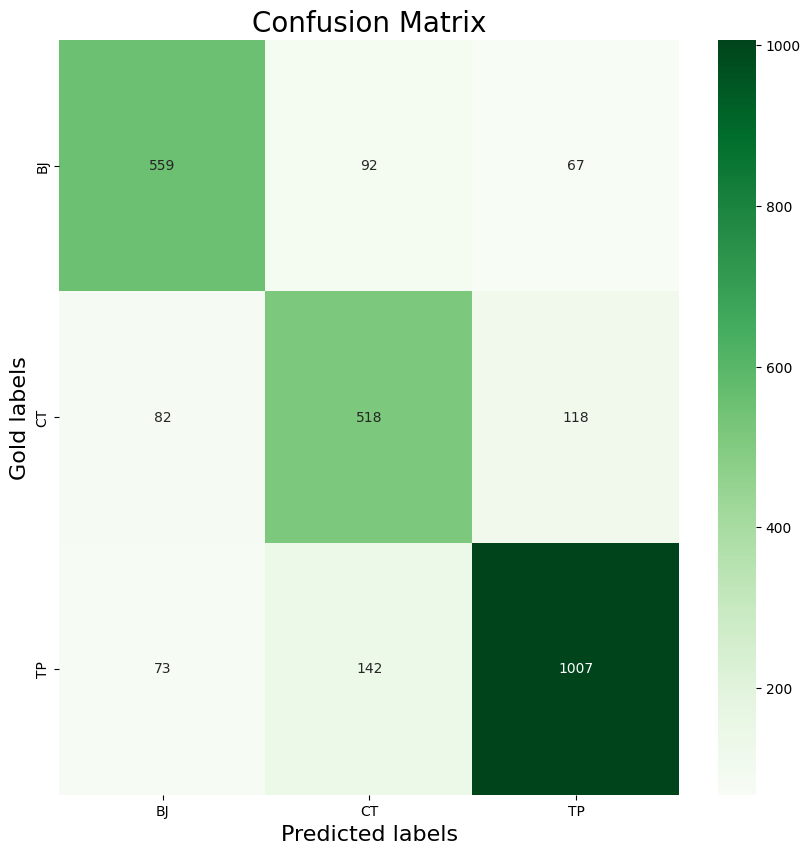

In [ ]:
best_model.evaluate(x_test,y_test)
y_pred = best_model.predict(x_test)

draw_confusion_matrix(y_test, y_pred,labels)

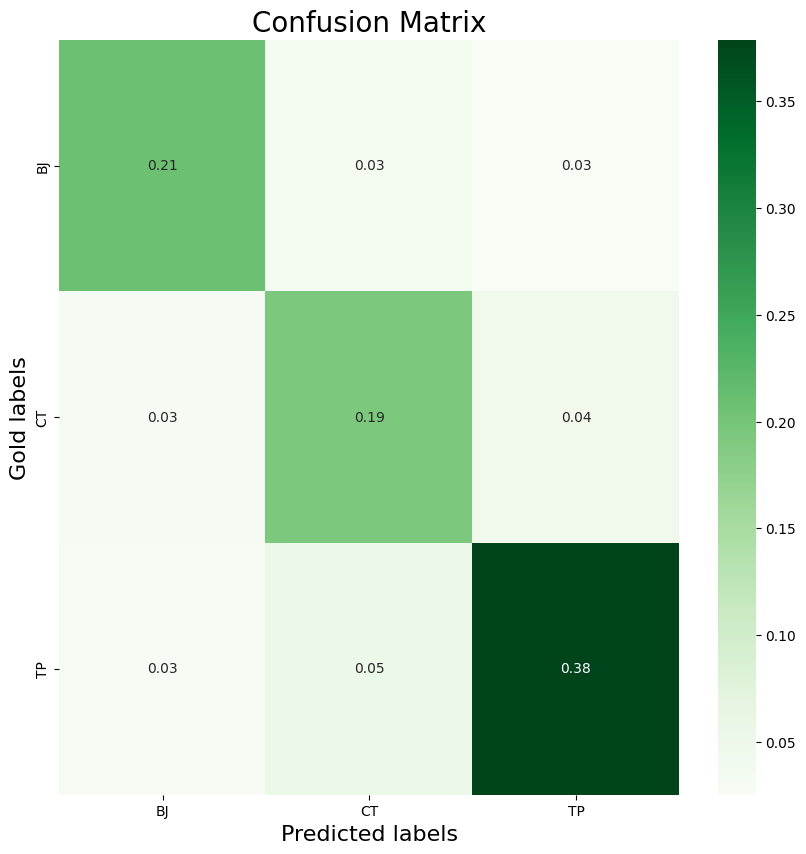

In [ ]:
draw_confusion_matrix(y_test, y_pred,labels,True)

WITH SHUFFLE

In [ ]:
train_data = train_BJ + train_CT + train_TP
test_data = test_BJ + test_CT + test_TP

train_shuffle, test_shuffle = shuffle_data(train_data, test_data, train_ratio)
x_sh_train, y_sh_train = loadDataImg(train_shuffle, "train", dict_locs)
x_sh_test, y_sh_test = loadDataImg(test_shuffle, "test", dict_locs)

  0%|          | 0/10633 [00:00<?, ?it/s]

  0%|          | 0/2658 [00:00<?, ?it/s]

In [ ]:
best_model = keras_RN(x_sh_train, y_sh_train, x_sh_test, y_sh_test,batch_size=64,epochs=200, early_stop=early_stop)

Epoch 1/200
133/133 [==============================] - 2s 7ms/step - loss: 1.0576 - accuracy: 0.4572 - val_loss: 0.9978 - val_accuracy: 0.4960
Epoch 2/200
133/133 [==============================] - 1s 5ms/step - loss: 0.9377 - accuracy: 0.5578 - val_loss: 0.8973 - val_accuracy: 0.5994
Epoch 3/200
133/133 [==============================] - 1s 5ms/step - loss: 0.8654 - accuracy: 0.6053 - val_loss: 0.8507 - val_accuracy: 0.6182
Epoch 4/200
133/133 [==============================] - 1s 6ms/step - loss: 0.8120 - accuracy: 0.6380 - val_loss: 0.7638 - val_accuracy: 0.6700
Epoch 5/200
133/133 [==============================] - 1s 6ms/step - loss: 0.7748 - accuracy: 0.6605 - val_loss: 0.7393 - val_accuracy: 0.6841
Epoch 6/200
133/133 [==============================] - 1s 6ms/step - loss: 0.7194 - accuracy: 0.6874 - val_loss: 0.7172 - val_accuracy: 0.6930
Epoch 7/200
133/133 [==============================] - 1s 5ms/step - loss: 0.6848 - accuracy: 0.7054 - val_loss: 0.6734 - val_accuracy: 0.7217

84/84 [==============================] - 0s 3ms/step - loss: 0.4932 - accuracy: 0.8153


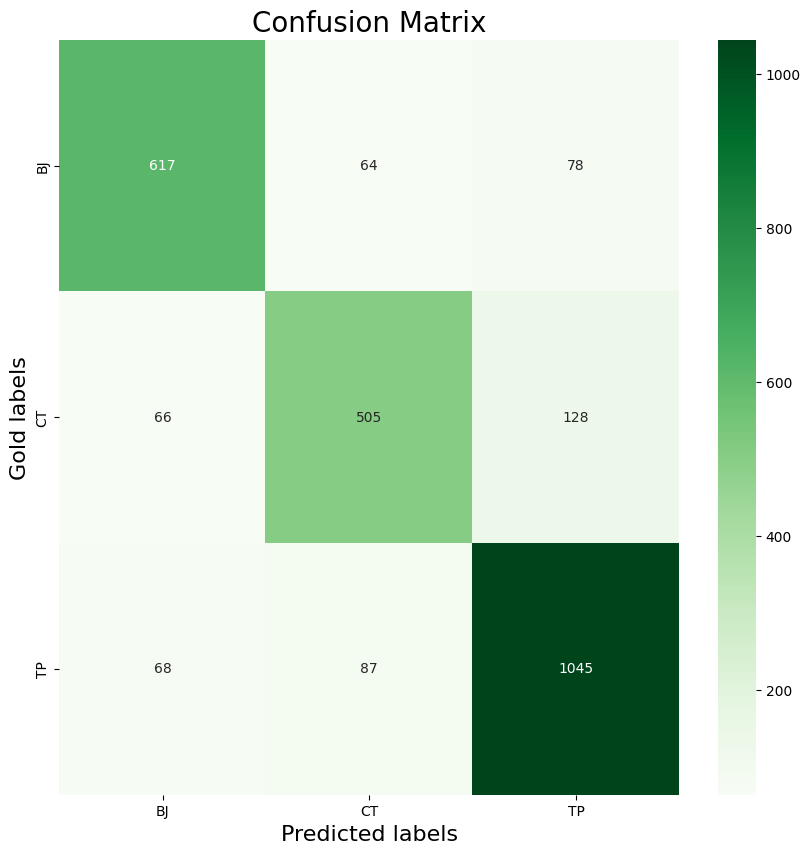

In [ ]:
best_model.evaluate(x_sh_test, y_sh_test)
y_sh_pred = best_model.predict(x_sh_test)

draw_confusion_matrix(y_sh_test, y_sh_pred,labels)